# AIA iris dataset

匯入(import)函式及模組 <br>
numpy：資料處理 <br>
pandas：讀取、處理數據 <br>
matplotlib(matplot) ： 繪製數圖 <br>
csv(逗點分隔)：讀取文字檔格式 <br>

In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
plt.rcParams['font.family']='SimHei' #顯示中文
%matplotlib inline

pd.read_csv : 匯入csv資料

In [2]:
#將train.csv、test.csv、submission匯入
train = pd.read_csv('data/train.csv', encoding = "utf-8") #加上encoding ="utf-8"以免某些字串無法讀取
test = pd.read_csv('data/test.csv', encoding = "utf-8")
submission = pd.read_csv('data/submission.csv',encoding = "utf-8")

In [3]:
train.head(4) #觀察train頭四筆資料

,id,花萼長度,花萼寬度,花瓣長度,花瓣寬度,屬種,type
0,1,5.4,3.7,1.5,0.2,Iris-setosa,1
1,2,4.8,3.4,1.6,0.2,Iris-setosa,1
2,3,4.8,3.0,1.4,0.1,Iris-setosa,1
3,4,4.3,3.0,1.1,0.1,Iris-setosa,1


In [4]:
test.head(4) #觀察test頭四筆資料

,id,花萼長度,花萼寬度,花瓣長度,花瓣寬度
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2


In [5]:
submission.head(4) #觀察submission頭四筆資料

,id,type
0,1,0
1,2,0
2,3,0
3,4,0


In [6]:
train.shape #查看train的矩陣、數組維數

(123, 7)

以seaborn來去繪製視覺化API <br>
觀看花瓣長度及花瓣寬度的分布狀況

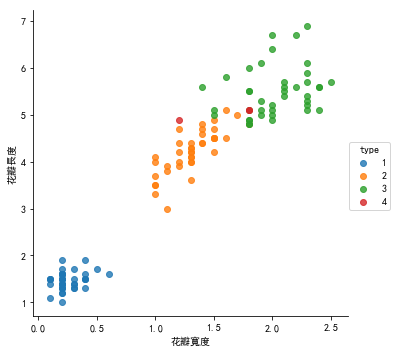

In [7]:
import seaborn as sns
sns.lmplot('花瓣寬度','花瓣長度',data=train,fit_reg=False,hue='type')

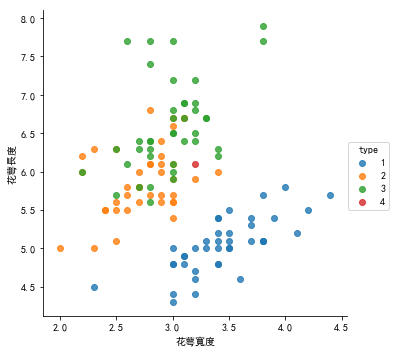

In [8]:
#觀看花萼長度及花萼寬度的分布狀況
sns.lmplot('花萼寬度','花萼長度',data=train,fit_reg=False,hue='type')

## One Hot Encoding
https://read01.com/zh-tw/5M32Jn.html#.WzsBU9UzaUk

優點： <br>
解決了分類器不好處理屬性數據的問題 <br>
在一定程度上也起到了擴充特徵的作用 <br>

In [9]:
#將文字轉為編碼，0亦即否，1亦即是，更容易判別
df1 = pd.get_dummies(train['屬種'])
df1.sample(5)

,Iris-new_type,Iris-setosa,Iris-versicolor,Iris-virginica
20,0,1,0,0
86,0,0,0,1
74,0,0,1,0
98,0,0,0,1
59,0,0,1,0


## Label Encoding
http://pbpython.com/categorical-encoding.html

In [10]:
#將各個屬種以數字編碼代為處理
df2 = train['屬種'].replace({'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3,'Iris-new_type':4})
df2.sample(10)

60     2
97     3
106    3
78     2
1      1
23     1
26     1
34     1
18     1
116    3
Name: 屬種, dtype: int64

## Data Clean 清除缺值
https://realpython.com/python-data-cleaning-numpy-pandas/

In [11]:
#找到train中有多少null的值
nullvalue_train = train.isnull().sum()
nullvalue_train

id      0
花萼長度    1
花萼寬度    1
花瓣長度    0
花瓣寬度    0
屬種      0
type    0
dtype: int64

In [12]:
#找到test中有多少null的值
nullvalue_test = test.isnull().sum()
nullvalue_test

id      0
花萼長度    0
花萼寬度    0
花瓣長度    0
花瓣寬度    0
dtype: int64

In [13]:
#印出花萼寬度及花萼長度null值的筆數
print(train[train['花萼寬度'].isnull()])
print('********************************************************************')
print(train[train['花萼長度'].isnull()])

      id  花萼長度  花萼寬度  花瓣長度  花瓣寬度             屬種  type
121  122   5.2   NaN   5.1   1.8  Iris-new_type     4
********************************************************************
      id  花萼長度  花萼寬度  花瓣長度  花瓣寬度             屬種  type
120  121   NaN   3.0   4.9   1.2  Iris-new_type     4


In [14]:
#若是筆數很少，不影響建模則可drop掉
train_d_na = train.dropna().reset_index(drop=True)
train_d_na.isnull().sum().sort_values(ascending=False)

type    0
屬種      0
花瓣寬度    0
花瓣長度    0
花萼寬度    0
花萼長度    0
id      0
dtype: int64

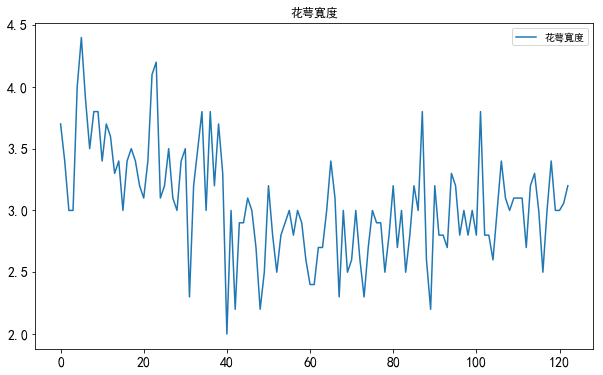

In [15]:
#將空值補平均數(np.mean)
train[['花萼寬度']] = train[['花萼寬度']].fillna(np.mean(train[['花萼寬度']]))
#繪製折線圖以觀察其差異性
train.plot(kind='line',y='花萼寬度',figsize=(10,6),fontsize=14,title='花萼寬度')

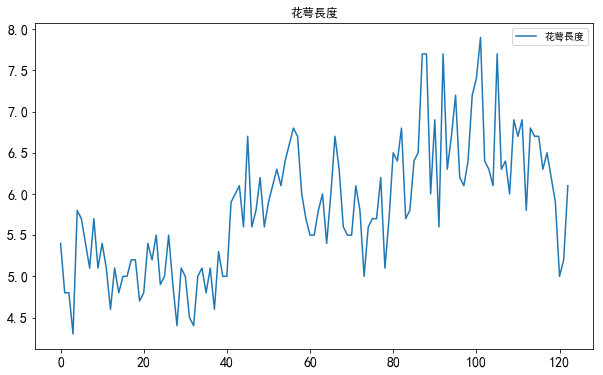

In [16]:
#將空值補眾數(mode)
train[['花萼長度']] = train[['花萼長度']].fillna(train['花萼長度'].mode()[0])
#繪製折線圖以觀察其差異性
train.plot(kind='line',y='花萼長度',figsize=(10,6),fontsize=14,title='花萼長度')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000BCAF08FCF8>,
      dtype=object)

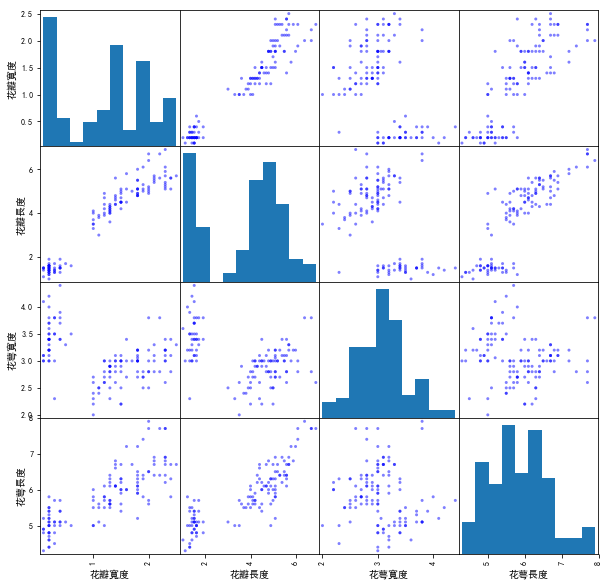

In [17]:
#繪製散布矩陣圖來做四種變數的分析及比較
from pandas.plotting import scatter_matrix
scatter_matrix( train[['花瓣寬度','花瓣長度','花萼寬度','花萼長度']],figsize=(10, 10),color='b')

In [18]:
#切分離群值type 4 (iris-new_type) 以免影響建模
train = train[train['type']!=4]

In [19]:
#切分資料
from sklearn.model_selection import train_test_split

X = train[['花瓣寬度','花瓣長度','花萼寬度','花萼長度']]
y = train['type']
#隨機將數據分成四個新數據集，培訓功能，培訓結果，測試功能
#並測試結果。將測試數據的大小設置為完整數據集的30%，70%為訓練集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100)
X.sample(10)

,花瓣寬度,花瓣長度,花萼寬度,花萼長度
113,2.3,5.9,3.2,6.8
8,0.3,1.7,3.8,5.7
86,1.8,5.5,3.0,6.5
88,2.3,6.9,2.6,7.7
31,0.3,1.3,2.3,4.5
60,1.1,3.8,2.4,5.5
59,1.0,3.5,2.6,5.7
58,1.5,4.5,2.9,6.0
64,1.5,4.5,3.0,5.4
0,0.2,1.5,3.7,5.4


## 資料標準化
https://ithelp.ithome.com.tw/articles/10197357

In [20]:
#按比例縮放，讓資料落在某一特定的區間
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [21]:
#訓練結果_標準化
X_train_std[0:5]

array([[ 0.82172682,  1.27937769,  0.47468749,  1.65481456],
       [ 1.36523117,  1.04600587, -0.44195042,  0.65747341],
       [-1.35229059, -1.2877124 ,  0.24552801, -1.33720889],
       [ 0.41409855,  0.22920447,  0.01636853,  0.03413519],
       [-1.08053842, -1.46274127,  2.07880383, -0.58920303]])

In [22]:
#測試結果_標準化
X_test_std[0:5]

array([[ 0.14234638,  0.11251856, -1.12942885, -0.46453539],
       [ 0.14234638,  0.28754743, -0.21279094,  0.65747341],
       [-1.35229059, -1.40439831,  0.47468749, -1.58654418],
       [ 0.41409855,  0.40423334,  0.01636853, -0.33986774],
       [ 1.63698335,  1.04600587,  0.93300645,  0.53280576]])

In [23]:
y_test[0:5]

69     2
54     2
37     1
46     2
106    3
Name: type, dtype: int64

## 建立模型

利用xgb進行預測及模型製作

In [25]:
import xgboost as xgb
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

xgb = xgb.XGBClassifier(n_estimators= 2000, max_depth= 4).fit(X_train, y_train)

print(metrics.classification_report(y_test, xgb.predict(X_test)))
#顯示xgb成績
print("Score:", xgb.score(X_test, y_test))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        14
          2       1.00      0.90      0.95        10
          3       0.92      1.00      0.96        12

avg / total       0.97      0.97      0.97        36

Score: 0.9722222222222222


In [26]:
print(xgb.feature_importances_)

[0.23069175 0.1608462  0.5305574  0.07790463]


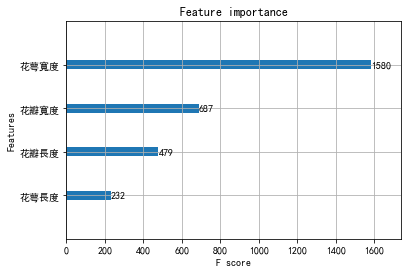

In [27]:
#繪製長條圖觀看哪個Feature較具影響力
from xgboost import plot_importance
plot_importance(xgb, )
plt.show()

In [29]:
pred = xgb.predict(test[['花瓣寬度','花瓣長度','花萼寬度','花萼長度']])

In [30]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 2, 3, 3, 3], dtype=int64)

## 資料匯出
https://docs.python.org/2/library/csv.html

In [31]:
Submission_dataframe = pd.DataFrame({ 'id': submission.id, 'type': pred })
Submission_dataframe.to_csv("data/submission1.csv", index=False)

In [32]:
submission = pd.read_csv('data/submission1.csv', encoding = "utf-8", dtype = {'type': np.int32})
submission

,id,type
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
5,6,1
6,7,1
7,8,1
8,9,1
9,10,1
